In [1]:
import os
os.chdir('drive/MyDrive/Datasets/NYC-AirBNB')

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import time
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
airbnb = pd.read_csv('AB_NYC_2019.csv', parse_dates=['last_review'])

In [4]:
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48895 non-null  int64         
 1   name                            48879 non-null  object        
 2   host_id                         48895 non-null  int64         
 3   host_name                       48874 non-null  object        
 4   neighbourhood_group             48895 non-null  object        
 5   neighbourhood                   48895 non-null  object        
 6   latitude                        48895 non-null  float64       
 7   longitude                       48895 non-null  float64       
 8   room_type                       48895 non-null  object        
 9   price                           48895 non-null  int64         
 10  minimum_nights                  48895 non-null  int64         
 11  nu

In [6]:
airbnb.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


## 1.Data Cleaning

In [7]:
airbnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

### Handling Datetime
`last_review` column has around 10K missing values, we can divide it to year, month and day and then fill each one separately.

In [8]:
airbnb['last_review_year'] = airbnb['last_review'].dt.year
airbnb['last_review_month'] = airbnb['last_review'].dt.month
airbnb['last_review_day'] = airbnb['last_review'].dt.day

In [9]:
airbnb['last_review_year'].fillna(airbnb['last_review_year'].value_counts().index[0], inplace = True)
airbnb['last_review_month'].fillna(airbnb['last_review_month'].value_counts().index[0], inplace = True)
airbnb['last_review_day'].fillna(int(airbnb['last_review_day'].mean()), inplace = True)

In [10]:
airbnb = airbnb.astype({'last_review_year': 'int32', 'last_review_month':'int32', 'last_review_day':'int32'})

In [11]:
airbnb.dtypes

id                                         int64
name                                      object
host_id                                    int64
host_name                                 object
neighbourhood_group                       object
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
last_review_year                           int32
last_review_month                          int32
last_review_day                            int32
dtype: object

### Invalid Prices

In [12]:
airbnb.price.describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [13]:
airbnb.price.value_counts()[0]

11

11 records has a price of 0, which makes no sense, so we drop these records.

In [14]:
airbnb = airbnb[airbnb['price'] > 0]

It seems some of hosts share the same name, and since `host_name` column has some NaN values, we can drop this column and identify hosts with their IDs. We won't need other features like `name`, `id` and `last_review` too, so it doesn't harm to drop them.

In [15]:
print(f'We have {airbnb.host_id.nunique()} unique host ids and {airbnb.host_name.nunique()} unique host names.')

We have 37455 unique host ids and 11450 unique host names.


In [16]:
airbnb = airbnb.drop(['id', 'name', 'host_name', 'last_review'], axis=1)

In [17]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48884 entries, 0 to 48894
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         48884 non-null  int64  
 1   neighbourhood_group             48884 non-null  object 
 2   neighbourhood                   48884 non-null  object 
 3   latitude                        48884 non-null  float64
 4   longitude                       48884 non-null  float64
 5   room_type                       48884 non-null  object 
 6   price                           48884 non-null  int64  
 7   minimum_nights                  48884 non-null  int64  
 8   number_of_reviews               48884 non-null  int64  
 9   reviews_per_month               38833 non-null  float64
 10  calculated_host_listings_count  48884 non-null  int64  
 11  availability_365                48884 non-null  int64  
 12  last_review_year                

In [18]:
airbnb[['reviews_per_month', 'number_of_reviews']]

,reviews_per_month,number_of_reviews
0,0.21,9
1,0.38,45
2,NaN,0
3,4.64,270
4,0.10,9
...,...,...
48890,NaN,0
48891,NaN,0
48892,NaN,0
48893,NaN,0


### Filling Missing Values
Let's fill the NaN values for `reviews_per_month` column with 0.


In [19]:
airbnb.reviews_per_month.fillna(0, inplace=True)

In [20]:
print(f'There are {airbnb.isnull().sum().values.sum()} missing values left in dataset.')

There are 0 missing values left in dataset.


### Deleting Outliers


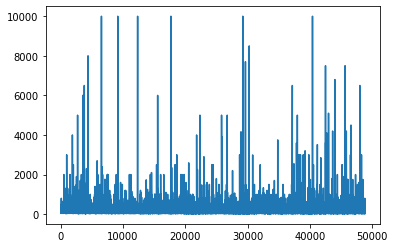

In [21]:
airbnb['price'].plot()

In [22]:
all_len = len(airbnb)
for cols in airbnb.columns:
    if airbnb[cols].dtype == 'int64' or airbnb[cols].dtype == 'float64':
        upper_range = airbnb[cols].mean() + 3 * airbnb[cols].std()
        lower_range = airbnb[cols].mean() - 3 * airbnb[cols].std()
        
        indexs = airbnb[(airbnb[cols] > upper_range) | (airbnb[cols] < lower_range)].index
        airbnb = airbnb.drop(indexs)
print(f'{all_len - len(airbnb)} records where dropped. Now we have {len(airbnb)} records.')

4772 records where dropped. Now we have 44112 records.


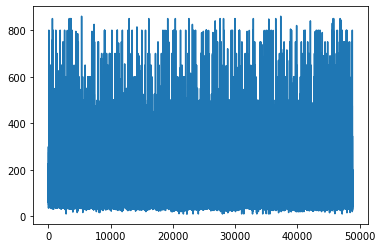

In [23]:
airbnb['price'].plot()

## 2.Visualizations

Let's see the number of ads by `neighbourhood_group`. We can see that most of the ads belong to **Manhattan** & **Brooklyn**. So during one-hot encoding we can consider **Queens**, **Bronx** & **Staten Island** as **Others** to reduce features. On the other hand, `neighbourhood` feature has much more unique values, with One-Hot Encoding we end up having so many features. 

In [24]:
print(f'There are {airbnb.neighbourhood_group.nunique()} unique values for neighbourhood column.')
airbnb['neighbourhood_group'].value_counts()

There are 5 unique values for neighbourhood column.


Manhattan        19651
Brooklyn         19059
Queens            4279
Bronx              955
Staten Island      168
Name: neighbourhood_group, dtype: int64

In [25]:
print(f'{round(airbnb.neighbourhood_group.value_counts().values[:2].sum() * 100 / len(airbnb))}% of ads are for Brooklyn and Manhattan area.')

88% of ads are for Brooklyn and Manhattan area.


Text(0.5, 1.0, 'Neighbourhood Group')

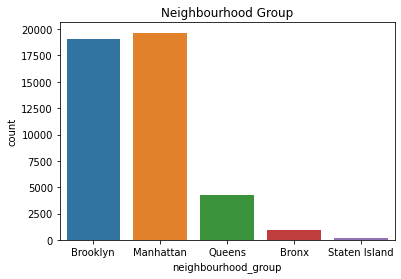

In [26]:
sns.countplot(x=airbnb['neighbourhood_group'])
plt.title('Neighbourhood Group')

In [27]:
print(f'There are {airbnb.neighbourhood.nunique()} unique values for neighbourhood column.')
airbnb['neighbourhood'].value_counts()

There are 168 unique values for neighbourhood column.


Williamsburg          3718
Bedford-Stuyvesant    3479
Harlem                2515
Bushwick              2344
Upper West Side       1829
                      ... 
West Farms               2
Dongan Hills             1
Fort Wadsworth           1
Woodlawn                 1
Grymes Hill              1
Name: neighbourhood, Length: 168, dtype: int64

Text(0.5, 1.0, 'Neighbourhood')

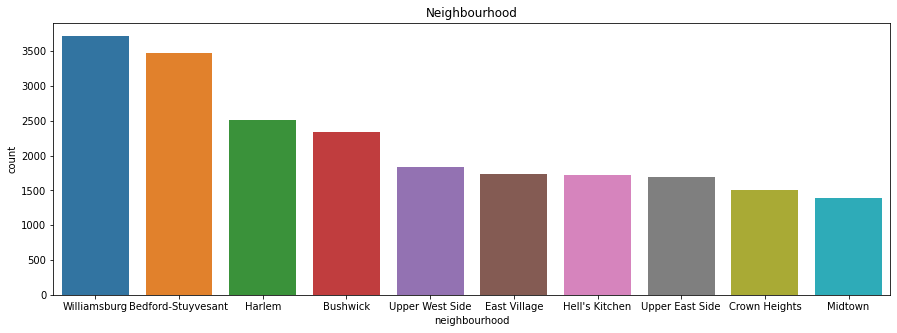

In [28]:
sns.countplot(x=airbnb['neighbourhood'], order=airbnb['neighbourhood'].value_counts().iloc[:10].index)
fig = plt.gcf()
fig.set_size_inches(15, 5)
plt.title('Neighbourhood')

Text(0.5, 1.0, 'Room Type')

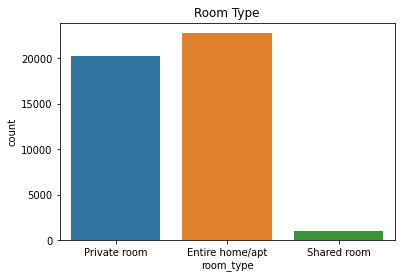

In [29]:
sns.countplot(x=airbnb['room_type'])
plt.title('Room Type')

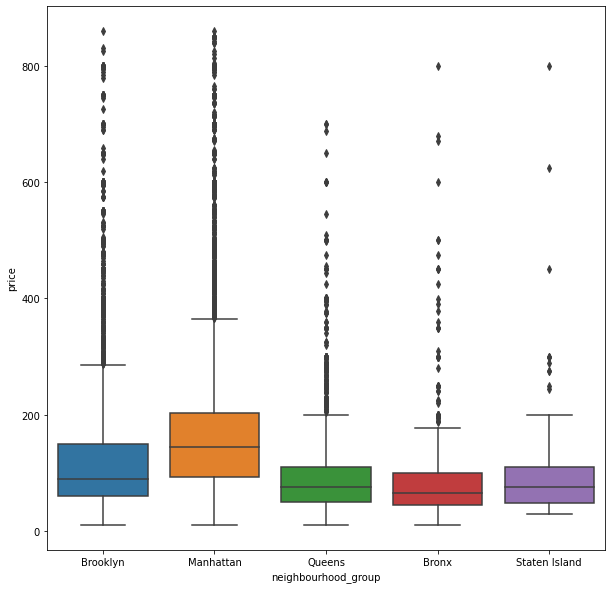

In [30]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(data=airbnb, x='neighbourhood_group', y='price')

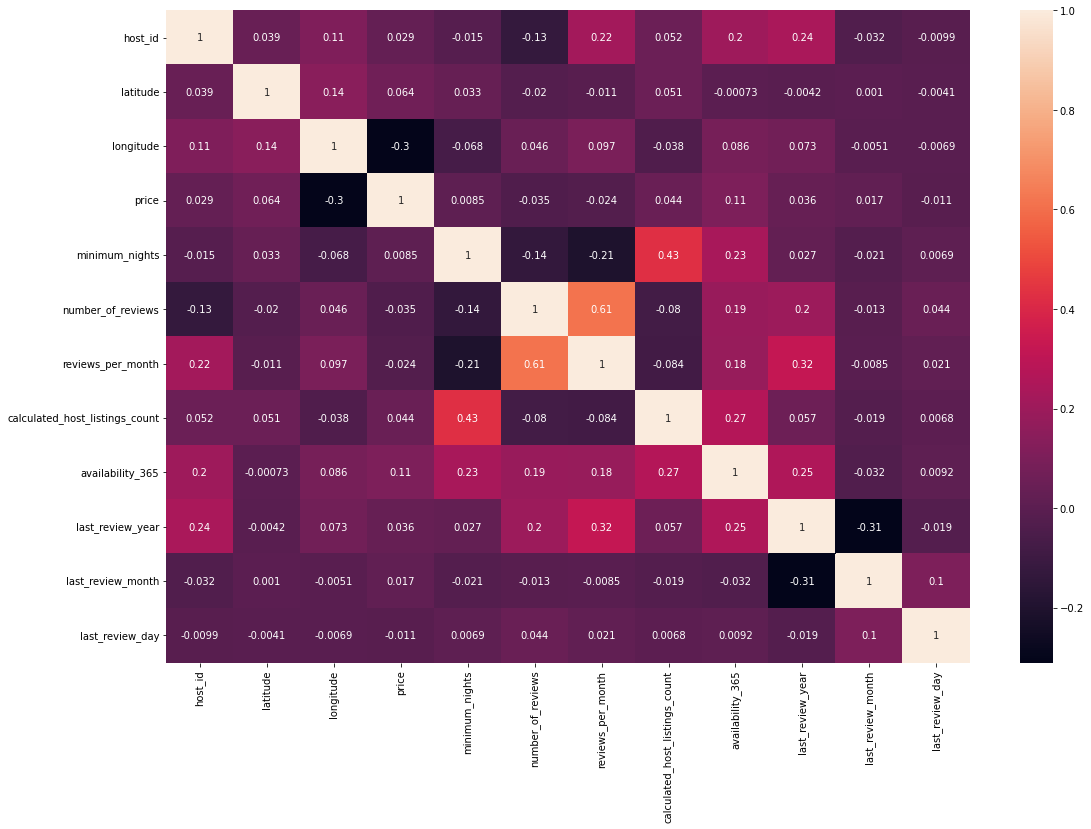

In [31]:
corr = airbnb.corr()
plt.figure(figsize=(18,12))
sns.heatmap(corr, annot=True)

## 3.Active owners

Text(0.5, 1.0, 'Ads per Host_ID')

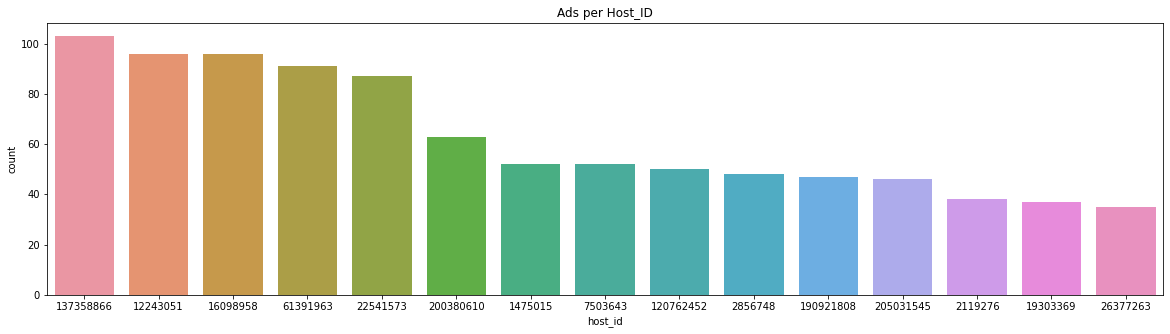

In [32]:
sns.countplot(x=airbnb['host_id'], order=airbnb['host_id'].value_counts().iloc[:15].index)
fig = plt.gcf()
fig.set_size_inches(20, 5)
plt.title('Ads per Host_ID')

In [33]:
hosts = airbnb['host_id'].value_counts()[:10]
hosts = pd.DataFrame(data={'host_id':list(hosts.index), 'unique_ads':hosts.values})

In [34]:
hosts['unique_places'] = hosts['host_id'].apply(lambda row: airbnb[airbnb['host_id']==row]['latitude'].nunique())
hosts['unique_neighbourhoods'] = hosts['host_id'].apply(lambda row: airbnb[airbnb['host_id']==row]['neighbourhood'].nunique())
hosts['manhattan_ads'] = hosts['host_id'].apply(lambda row: airbnb[(airbnb['host_id']==row) & (airbnb['neighbourhood_group'] == 'Manhattan')].shape[0])
hosts['brooklyn_ads'] = hosts['host_id'].apply(lambda row: airbnb[(airbnb['host_id']==row) & (airbnb['neighbourhood_group'] == 'Brooklyn')].shape[0])
hosts['queens_ads'] = hosts['host_id'].apply(lambda row: airbnb[(airbnb['host_id']==row) & (airbnb['neighbourhood_group'] == 'Queens')].shape[0])
hosts['bronx_ads'] = hosts['host_id'].apply(lambda row: airbnb[(airbnb['host_id']==row) & (airbnb['neighbourhood_group'] == 'Bronx')].shape[0])
hosts['staten_island_ads'] = hosts['host_id'].apply(lambda row: airbnb[(airbnb['host_id']==row) & (airbnb['neighbourhood_group'] == 'Staten Island')].shape[0])

In [35]:
hosts

,host_id,unique_ads,unique_places,unique_neighbourhoods,manhattan_ads,brooklyn_ads,queens_ads,bronx_ads,staten_island_ads
0,137358866,103,101,10,18,6,79,0,0
1,12243051,96,91,5,96,0,0,0,0
2,16098958,96,96,10,96,0,0,0,0
3,61391963,91,90,10,91,0,0,0,0
4,22541573,87,83,14,86,1,0,0,0
5,200380610,63,63,11,63,0,0,0,0
6,1475015,52,50,9,52,0,0,0,0
7,7503643,52,47,1,0,52,0,0,0
8,120762452,50,42,1,50,0,0,0,0
9,2856748,48,47,10,48,0,0,0,0


In [36]:
top = list(airbnb['neighbourhood_group'].value_counts().head(2).index)
def edit_neighbourhood_group(x):
    if x not in top:
        return 'other'
    else:
        return x

airbnb['neighbourhood_group'] = airbnb['neighbourhood_group'].apply(edit_neighbourhood_group)
airbnb['neighbourhood_group'].value_counts()*100 / len(airbnb)

Manhattan    44.547969
Brooklyn     43.205930
other        12.246101
Name: neighbourhood_group, dtype: float64

## 4.Reviews as customer's count

In [37]:
airbnb.groupby(['host_id']).agg({'number_of_reviews': 'sum'}).sort_values(by=['number_of_reviews'], ascending=False)[:10]

,number_of_reviews
host_id,
6885157,1184
417504,935
31304940,818
16677326,818
17555570,805
17638424,756
65809485,752
22384027,744
45416627,727


In [38]:
airbnb.corr()['number_of_reviews'].apply(lambda x:abs(x)).sort_values(ascending=False)[1:]

reviews_per_month                 0.610989
last_review_year                  0.196909
availability_365                  0.190904
minimum_nights                    0.136150
host_id                           0.128716
calculated_host_listings_count    0.079643
longitude                         0.045846
last_review_day                   0.043635
price                             0.034771
latitude                          0.019840
last_review_month                 0.013217
Name: number_of_reviews, dtype: float64

## 5.Hypothesis Tests

In [39]:
prices = airbnb['price'].values
reviews = airbnb['number_of_reviews'].values
availability = airbnb['availability_365'].values
host_listings = airbnb['calculated_host_listings_count'].values
reviews_month = airbnb['reviews_per_month'].values

### q1 : `price` is normal

\begin{align}
&H_0: \text{Price is normally distributed.} \\
&H_1: \text{Price is not normally distributed.}
\end{align}

In [40]:
price_anderson = stats.anderson(prices)

In [41]:
for i in range(len(price_anderson.critical_values)):
	sl, cv = price_anderson.significance_level[i], price_anderson.critical_values[i]
	if price_anderson.statistic < cv:
		print('Probably Gaussian at the %.1f%% level' % (sl))
	else:
		print('Probably not Gaussian at the %.1f%% level' % (sl))

Probably not Gaussian at the 15.0% level
Probably not Gaussian at the 10.0% level
Probably not Gaussian at the 5.0% level
Probably not Gaussian at the 2.5% level
Probably not Gaussian at the 1.0% level


So null hypothesis is rejected and price is not Gaussian.

### q2 : Average rent size is 150$

\begin{align}
H_0: & \mu = 150$ \\
H_1: & \mu \neq 150 $
\end{align}

In [42]:
alpha = 0.05 
tstat, p_value = stats.ttest_1samp(prices, popmean = 150)
print(f't stat : {tstat} , p_value : {p_value}')
if p_value <= alpha:
    print("Null hypothesis rejected.")
else:
    print("Null hypothesis accepted.")

t stat : -21.76964602833756 , p_value : 1.6014418379965145e-104
Null hypothesis rejected.


Null hypothesis is rejected and price average is 138$ not 150$:

In [43]:
prices.mean()

138.81522034820458

In [44]:
alpha = 0.05 
tstat, p_value = stats.ttest_1samp(prices, popmean = 138)
print(f't stat : {tstat} , p_value : {p_value}')
if p_value <= alpha:
    print("Null hypothesis rejected.")
else:
    print("Null hypothesis accepted.")

t stat : 1.586715068871553 , p_value : 0.1125843596118746
Null hypothesis accepted.


### q3 : `number_of_reviews` and `reviews_per_month` distributions.

\begin{align}
&H_0: \text{They are from same distribution.} \\
&H_1: \text{They aren't from same distribution.}
\end{align}

In [45]:
stat, p = stats.f_oneway(reviews_month, reviews)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=14647.847, p=0.000
Probably different distributions


### q4 : `number_of_reviews` and `reviews_per_month` 

\begin{align}
&H_0: \text{They are correlated.} \\
&H_1: \text{They are not correlated.}
\end{align}

In [46]:
stat, p = stats.kendalltau(reviews_month, reviews)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent, null hypothesis rejected.')
else:
	print('Probably dependent, null hypothesis accepted.')

stat=0.687, p=0.000
Probably dependent, null hypothesis accepted.


### q5 : `number_of_reviews` and `availability_365`

\begin{align}
&H_0: \text{They are correlated.} \\
&H_1: \text{Those are not correlated.}
\end{align}

In [47]:
stat, p = stats.kendalltau(availability, reviews)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent, null hypothesis rejected.')
else:
	print('Probably dependent, null hypothesis accepted.')

stat=0.185, p=0.000
Probably dependent, null hypothesis accepted.


### q6 : `number_of_reviews` and `calculated_host_listings_count`

\begin{align}
&H_0: \text{They are correlated.} \\
&H_1: \text{Those are not correlated.}
\end{align}

In [48]:
stat, p = stats.kendalltau(host_listings, reviews)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent, null hypothesis rejected.')
else:
	print('Probably dependent, null hypothesis accepted.')

stat=0.057, p=0.000
Probably dependent, null hypothesis accepted.


## 6.Creating a model
tasks:
- add distance from airport feature
- drop unnecesarry columns
- encode categorical
- train-test split
- normalize features and target


### Calculate the distance between two points
The <a href='https://en.wikipedia.org/wiki/Haversine_formula'>haversine formula</a> calculates the distance on a sphere between two sets of GPS coordinates.<br>
Here we assign latitude values with $\varphi$ (phi) and longitude with $\lambda$ (lambda).

The distance formula works out to

${\displaystyle d=2r\arcsin \left({\sqrt {\sin ^{2}\left({\frac {\varphi _{2}-\varphi _{1}}{2}}\right)+\cos(\varphi _{1})\:\cos(\varphi _{2})\:\sin ^{2}\left({\frac {\lambda _{2}-\lambda _{1}}{2}}\right)}}\right)}$

where

$\begin{split} r&: \textrm {radius of the sphere (Earth's radius averages 6371 km)}\\
\varphi_1, \varphi_2&: \textrm {latitudes of point 1 and point 2}\\
\lambda_1, \lambda_2&: \textrm {longitudes of point 1 and point 2}\end{split}$

With this in mind, I will add a new feature that indicates the distance from **John F. Kennedy International Airport**. We can add more features like this (distance to exciting places in NYC) but I think you got the idea.

In [49]:
def haversine_distance(df, lat1, long1):
    """
    Calculates the haversine distance between 2 sets of GPS coordinates in df
    """
    r = 6371  # average radius of Earth in kilometers

    lat2 = np.array(40.641766, dtype='float32') # latitude of jfk airport
    long2 = np.array(-73.780968, dtype='float32') # longitude of jfk airport

    phi1 = np.radians(lat1)
    phi2 = np.radians(lat2)
    
    delta_phi = np.radians(lat2-lat1)
    delta_lambda = np.radians(long2-long1)
     
    a = np.sin(delta_phi/2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    d = (r * c) # in kilometers

    return d

In [50]:
airbnb['dist_jkf'] = haversine_distance(airbnb, airbnb['latitude'], airbnb['longitude'])

In [51]:
airbnb.dist_jkf

0        16.161287
1        21.142392
2        23.017261
4        22.192991
5        20.156148
           ...    
48890    14.828480
48891    14.470301
48892    23.867996
48893    21.897506
48894    22.211798
Name: dist_jkf, Length: 44112, dtype: float64

In [52]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44112 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         44112 non-null  int64  
 1   neighbourhood_group             44112 non-null  object 
 2   neighbourhood                   44112 non-null  object 
 3   latitude                        44112 non-null  float64
 4   longitude                       44112 non-null  float64
 5   room_type                       44112 non-null  object 
 6   price                           44112 non-null  int64  
 7   minimum_nights                  44112 non-null  int64  
 8   number_of_reviews               44112 non-null  int64  
 9   reviews_per_month               44112 non-null  float64
 10  calculated_host_listings_count  44112 non-null  int64  
 11  availability_365                44112 non-null  int64  
 12  last_review_year                

Lets drop the column that I think could not be helpful in training a model:

In [53]:
airbnb.drop(['host_id','neighbourhood','last_review_day'], axis=1, inplace=True)

### Handle categorical features
`room_type` and `neighbourhood_group` are categorical columns, let's one-hot encode them.

In [54]:
dummies_feature = pd.get_dummies(airbnb[['neighbourhood_group','room_type']])
dummies_feature.head()

,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_other,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,1,0,0,0,1,0
1,0,1,0,1,0,0
2,0,1,0,0,1,0
4,0,1,0,1,0,0
5,0,1,0,1,0,0


In [55]:
airbnb = pd.concat([airbnb, dummies_feature], axis=1)
airbnb = airbnb.drop(columns=['neighbourhood_group','room_type','latitude', 'longitude'])

In [56]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44112 entries, 0 to 48894
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   price                           44112 non-null  int64  
 1   minimum_nights                  44112 non-null  int64  
 2   number_of_reviews               44112 non-null  int64  
 3   reviews_per_month               44112 non-null  float64
 4   calculated_host_listings_count  44112 non-null  int64  
 5   availability_365                44112 non-null  int64  
 6   last_review_year                44112 non-null  int32  
 7   last_review_month               44112 non-null  int32  
 8   dist_jkf                        44112 non-null  float64
 9   neighbourhood_group_Brooklyn    44112 non-null  uint8  
 10  neighbourhood_group_Manhattan   44112 non-null  uint8  
 11  neighbourhood_group_other       44112 non-null  uint8  
 12  room_type_Entire home/apt       

There are 15 features left which is not much, so I don't use any dimensonality reduction. In the case of high dimensional datasets, we could use PCA.

In [57]:
airbnb.shape

(44112, 15)

In [58]:
y = airbnb['price']
x = airbnb.drop(columns=['price'])

In [59]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

In [60]:
scaler = StandardScaler()
scaler.fit(x_train)

StandardScaler()

In [61]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [62]:
rf = RandomForestRegressor()
lr = LinearRegression()

In [63]:
y_train = np.array(y_train)
y_min = y_train.min()
y_max = y_train.max()
Y_train = (y_train - y_min) / (y_max - y_min)
Y_test = (y_test - y_min) / (y_max - y_min)

In [64]:
s_time = time.time()
lr.fit(x_train, Y_train)
print(f'Training LinearRegression model took {time.time() - s_time}s.')

Training LinearRegression model took 0.023310184478759766s.


In [65]:
lr_prediction = lr.predict(x_test)
lr_mse = mean_squared_error(Y_test, lr_prediction)
print(f'LinearRegression MSE: {lr_mse}')

LinearRegression MSE: 0.010111193784616921


In [66]:
s_time = time.time()
rf.fit(x_train, Y_train)
print(f'Training RandomForestRegressor model took {time.time() - s_time}s.')

Training RandomForestRegressor model took 36.07289719581604s.


In [67]:
rf_prediction = rf.predict(x_test)
rf_mse = mean_squared_error(Y_test, rf_prediction)
print(f'RandomForestRegressor MSE: {rf_mse}')

RandomForestRegressor MSE: 0.008771651621184996
